In [1]:
import pandas as pd
df = pd.read_csv('winequality.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
# a mapping dictionary that maps the quality values from 0 to 5
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}

df.loc[:, "quality"] = df.quality.map(quality_mapping)

In [3]:
# use sample with frac=1 to shuffle the dataframe
df = df.sample(frac=1).reset_index(drop=True)
df_train = df.head(1000)
df_test = df.tail(599)

In [4]:
from sklearn import tree
from sklearn import metrics

clf = tree.DecisionTreeClassifier(max_depth=3)
X_train = df_train.drop(columns=['quality'])
y_train = df_train.quality
X_test = df_test.drop(columns=['quality'])
y_test = df_test.quality

clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [5]:
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)
train_accuracy = metrics.accuracy_score(y_train, train_predictions)
test_acccuracy = metrics.accuracy_score(y_test, test_predictions)

In [6]:
train_accuracy, test_acccuracy

(0.605, 0.5542570951585977)

Text(0, 0.5, 'count')

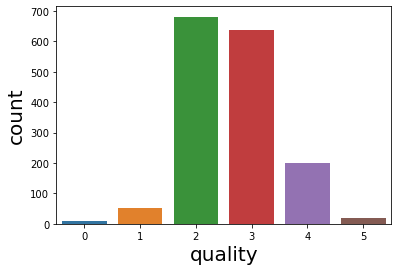

In [7]:
import seaborn as sns

b = sns.countplot(x='quality', data=df)
b.set_xlabel('quality', fontsize=20)
b.set_ylabel('count', fontsize=20)

Looking at this figure, we can see that the distribution of quality is very much skewed. Some classes have a lot of samples, and some don't have that many. If we do a simple k-fold, we won't have an equal distribution of targets in every fold. Thus, we choose stratified k-fold in this case.

To use stratified k-fold for a regression problem, we first have to divide the target into bins, and then we can use stratified k-fold in the same way as for classification problems. If you don't have a lot of samples, then you can use *Sturge's rule* to calculate the appropriate number of bins:

                                \[Number of bins = 1 + log_2(N)\]